**In this notebook we try to divvied the customers pool into a number of segments to determine what groups are the most profitable for the business. Thus easing the ads deployment process, presenting offers, etc.**

**We have some basic [data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) about the customers of supermarket mall like Customer ID, age, gender, annual income and spending score.
Spending Score is something we assign to the customer based on pre-defined parameters like customer behavior and purchasing data. **

# 1. **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report , confusion_matrix
%matplotlib inline

# 2. **Importing the dataset**

In [2]:
data=pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 3. **One hot encoding the data**

In [4]:
data['Male']=pd.get_dummies(data['Gender'],drop_first=True)

In [5]:
data=data.drop(['Gender','CustomerID','Male','Age'],axis=1)

In [6]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# 4. **Scaling the data**

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [8]:
ssc=StandardScaler()

In [9]:
data=ssc.fit_transform(data)

# 5. **Defining the optimal number of segments**

**First let's use the elbow method. Using the scores of every segmentation.**

**What k-means essentially does is find cluster centers that minimize the sum of distances between data samples and their associated cluster centers.**

In [10]:
clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
scores = []
for i in clusters:
    kmeans = KMeans(n_clusters=i)
    y_kmeans = kmeans.fit_predict(data)
    score = kmeans.score(data)
    scores.append(score)

(2.0, 29.0)

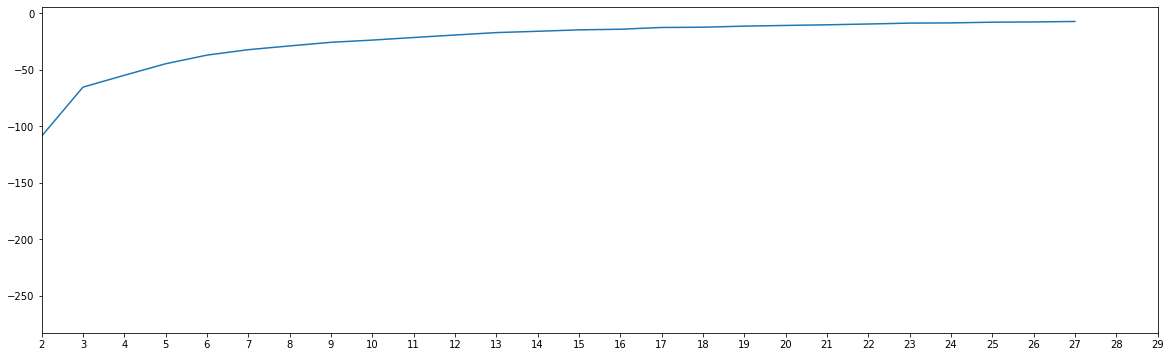

In [11]:
plt.figure(figsize=(20,6))
plt.plot(scores)
plt.xticks(ticks=clusters)
plt.xlim(clusters[0],clusters[-1])

**We can tell from the plot above that 3 is the optimal number of segments.**

**Let's do the same by using the Silhouette score.**

**The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). **

In [12]:
clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
scores = []
from sklearn.metrics import silhouette_score
for i in clusters:
    kmeans = KMeans(n_clusters=i)
    y_kmeans = kmeans.fit_predict(data)
    score = silhouette_score(data, y_kmeans)
    scores.append(score)

(2.0, 29.0)

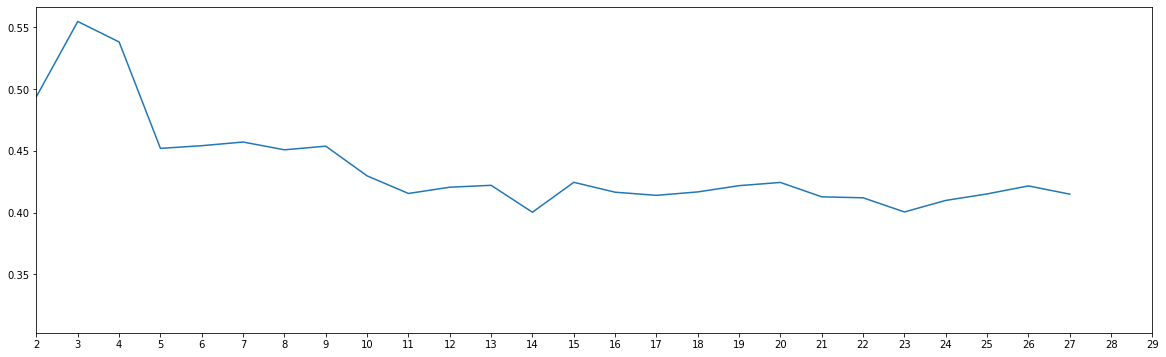

In [13]:
plt.figure(figsize=(20,6))
plt.plot(scores)
plt.xticks(ticks=clusters)
plt.xlim(clusters[0],clusters[-1])

**The Silhouette score has the highst value at 3 segments which means that it's the optimal number.**

# 6. **Visualising the dataset.**

**Let's check how 3 segments look like.**

In [14]:
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(data)

In [15]:
kmeans.cluster_centers_ = ssc.inverse_transform(kmeans.cluster_centers_)

In [16]:
data = ssc.inverse_transform(data)

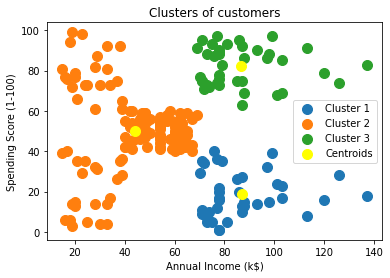

In [17]:
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s = 100, label = 'Cluster 1')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s = 100, label = 'Cluster 2')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s = 100, label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**While this number of segments satisfy the clustering scores the most. For business purposes it's better if we use a higher number because it would be hard to interpret the clusters into something useful (the first cluster covers a both high and low spending customers).**

**Ler's use 5 segments.**

In [18]:
kmeans = KMeans(n_clusters=5)
y_kmeans = kmeans.fit_predict(data)
kmeans.cluster_centers_ = ssc.inverse_transform(kmeans.cluster_centers_)
data = ssc.inverse_transform(data)

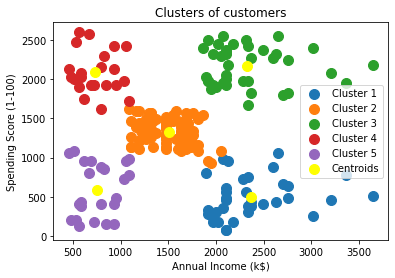

In [19]:
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s = 100, label = 'Cluster 1')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s = 100, label = 'Cluster 2')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s = 100, label = 'Cluster 3')
plt.scatter(data[y_kmeans == 3, 0], data[y_kmeans == 3, 1], s = 100, label = 'Cluster 4')
plt.scatter(data[y_kmeans == 4, 0], data[y_kmeans == 4, 1], s = 100, label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**By using 5 segments we can see 5 different groups based on the customers' spending and income.**

* **Cluster number 1 represents the high spending low income group of scustomers.**
* **Cluster number 2 represents the average spending average income group of scustomers.**
* **Cluster number 3 represents the high spending high income group of scustomers.**
* **Cluster number 4 represents the low spending high income group of scustomers.**
* **Cluster number 5 represents the low spending low income group of scustomers.**